<a href="https://colab.research.google.com/github/mateussdreis/modelos_machine_learning/blob/main/Regress%C3%A3o_linear_Plano_de_sa%C3%BAde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão linear simples

## Base plano saúde

#### Importando as bibliotecas

In [ ]:
# !pip install plotly --upgrade

In [1]:
#Bibliotecas utilizadas
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Lendo o dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_plano_saude = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto dados/introdução a machine learning/regressão linear/plano_saude.csv')
base_plano_saude

,idade,custo
0,18,871
1,23,1132
2,28,1242
3,33,1356
4,38,1488
5,43,1638
6,48,2130
7,53,2454
8,58,3066
9,63,4090


#### Separando os valores de predição

In [6]:
X_plano_saude = base_plano_saude['idade'].values

In [7]:
X_plano_saude

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

In [8]:
y_plano_saude = base_plano_saude['custo'].values
y_plano_saude

array([ 871, 1132, 1242, 1356, 1488, 1638, 2130, 2454, 3066, 4090])

#### Teste de Correlação

In [9]:
np.corrcoef(X_plano_saude,y_plano_saude)

array([[1.        , 0.93091958],
       [0.93091958, 1.        ]])

Text(0.5, 1.0, 'Correlação das variáveis')

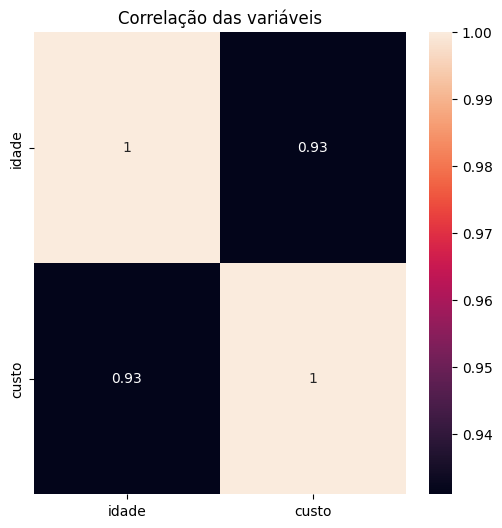

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(base_plano_saude.corr(), annot = True)
plt.title('Correlação das variáveis')

É possível verificar que existe uma correalação forte entre as duas variáveis.

#### Formato do dado

In [13]:
X_plano_saude.shape

(10,)

In [14]:
X_plano_saude = X_plano_saude.reshape(-1,1)

#### Criando o modelo e aplicando aos dados

In [15]:
from sklearn.linear_model import LinearRegression
regressor_plano_saude = LinearRegression()
regressor_plano_saude.fit(X_plano_saude, y_plano_saude)

LinearRegression()

#### Ponto onde a regressão linear intercepta o eixo Y e o coeficiente angular

In [17]:
print(f'O intercepto da regressão é {regressor_plano_saude.intercept_}')

o intercepto da regressão é -558.9490909090912


In [18]:
print(f'O coeficiente da regressão é {regressor_plano_saude.coef_}')

O coeficiente da regressão é [61.86787879]


#### Predict e o plot da regressão

In [19]:
previsoes = regressor_plano_saude.predict(X_plano_saude)
previsoes

array([ 554.67272727,  864.01212121, 1173.35151515, 1482.69090909,
       1792.03030303, 2101.36969697, 2410.70909091, 2720.04848485,
       3029.38787879, 3338.72727273])

In [20]:
X_plano_saude.ravel()

array([18, 23, 28, 33, 38, 43, 48, 53, 58, 63])

Text(0.5, 1.0, 'Dispersão dos Dados')

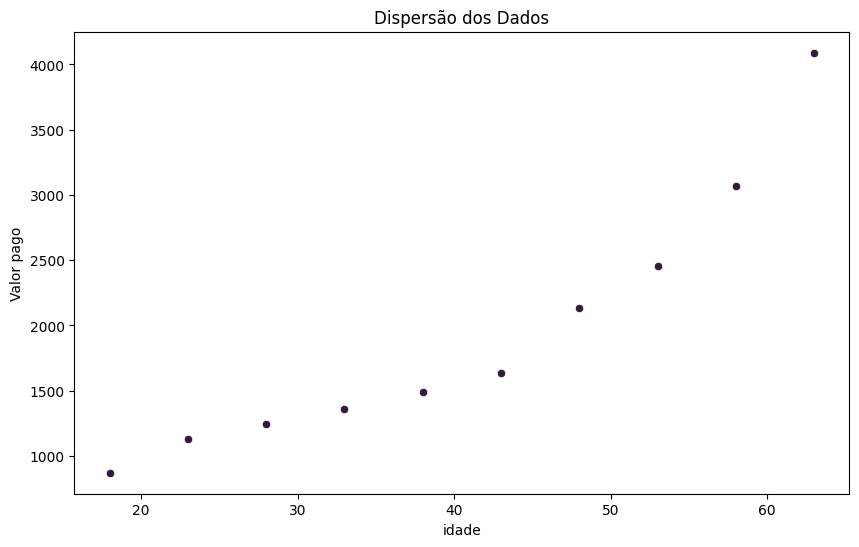

In [72]:
plt.figure(figsize=(10,6))
sns.set_palette('rocket');
sns.scatterplot(x = X_plano_saude.ravel(), y = y_plano_saude)
plt.xlabel('idade')
plt.ylabel('Valor pago')
plt.title('Dispersão dos Dados')

Text(0.5, 1.0, 'Reta de regressão')

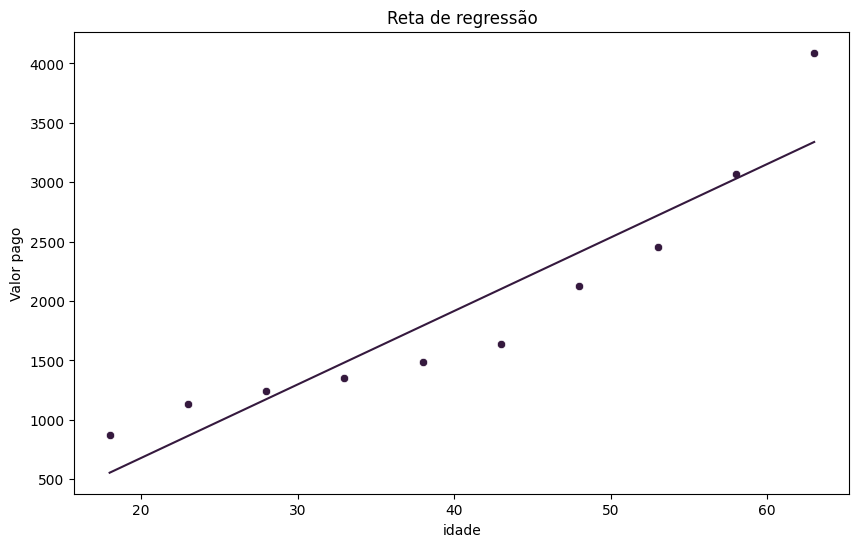

In [75]:
plt.figure(figsize=(10,6))
sns.set_palette('rocket');
sns.scatterplot(x = X_plano_saude.ravel(), y = y_plano_saude)
sns.lineplot(x= X_plano_saude.ravel(), y= previsoes)
plt.xlabel('idade')
plt.ylabel('Valor pago')
plt.title('Reta de regressão')

#### Prevendo novos valores que não estão no dataset

In [35]:
print('Equação da regressão')
print(f'y={regressor_plano_saude.intercept_} + {regressor_plano_saude.coef_[0]}x')

Equação da regressão
y=-558.9490909090912 + 61.867878787878794x


In [62]:
# Testado para uma idade de 40 anos
print(f'Se o assinante tiver 40 anos, ele deverá pagar :{regressor_plano_saude.predict([[80]])}')

Se o assinante tiver 40 anos, ele deverá pagar :[4390.48121212]


#### Usando a regressão polinomial

Nessa parte será testado se uma regressão polinomial não representa (visualmente) os dados.

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_plano_saude)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_plano_saude)

LinearRegression()

In [49]:
poly_predict = lin_reg_2.predict(poly_reg.fit_transform(X_plano_saude))
poly_predict

array([ 887.48951014, 1097.00233088, 1244.02564102, 1366.30303035,
       1504.50116556, 1702.20979025, 2005.94172498, 2465.13286718,
       3132.14219123, 4062.25174842])

Text(0.5, 1.0, 'Reta de regressão')

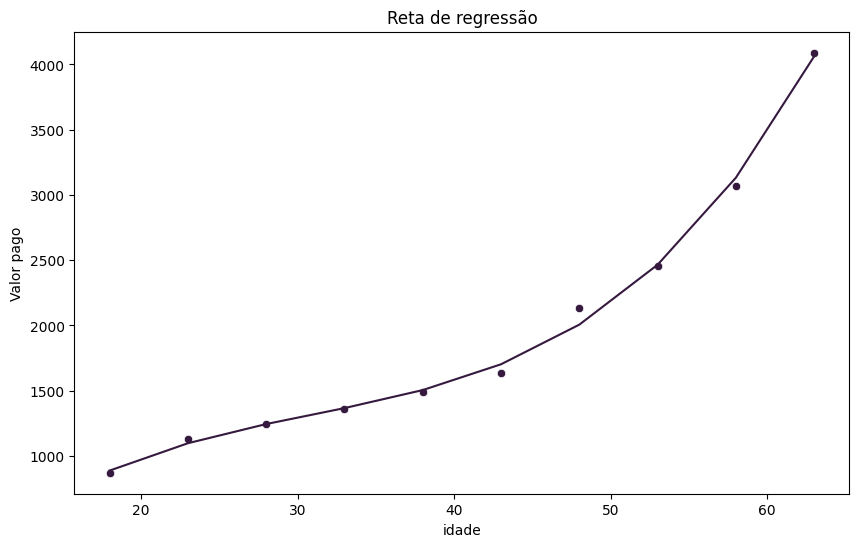

In [76]:
plt.figure(figsize=(10,6))
sns.set_palette('rocket');
sns.scatterplot(x = X_plano_saude.ravel(), y = y_plano_saude)
sns.lineplot(x= X_plano_saude.ravel(), y= poly_predict)
plt.xlabel('idade')
plt.ylabel('Valor pago')
plt.title('Reta de regressão')

Pode-se observar que o problema em questão se ajusta melhor a uma regressão polinomial.

In [66]:
#coeficientes da regressão polinomial
print(lin_reg_2.coef_)

[ 0.00000000e+00  1.59447464e+02 -3.97408765e+00  3.04478633e-02
  1.94871795e-04]


In [65]:
# Testando quanto um cliente de 40 anos deverá pagar
lin_reg_2.predict([[40,40,40,40,40]])

array([5327.17151515])

## Conclusão

O melhor ajuste perceptivel na análise gráfica indica que para a situação envolvendo a predição de valores para o plano de saúde, um modelo polinomial se mostrou mais adequado.